In this example, we'll create a quantum circuit where a central qubit (q0) is used to distribute entanglement to multiple other qubits (q1, q2, etc.). 

This is a common scenario in distributed quantum computing, where a central node (control qubit) needs to entangle with several other nodes but those nodes do not need to interact with each other.



Transpiled Circuit with Star Topology:
         ┌───┐           ░            ░ ┌─┐      
q_0 -> 0 ┤ H ├──■────■───░───■────■───░─┤M├──────
         └───┘┌─┴─┐  │   ░ ┌─┴─┐  │   ░ └╥┘┌─┐   
q_1 -> 1 ─────┤ X ├──┼───░─┤ X ├──┼───░──╫─┤M├───
              └───┘┌─┴─┐ ░ └───┘┌─┴─┐ ░  ║ └╥┘┌─┐
q_2 -> 2 ──────────┤ X ├─░──────┤ X ├─░──╫──╫─┤M├
                   └───┘ ░      └───┘ ░  ║  ║ └╥┘
 meas: 3/════════════════════════════════╩══╩══╩═
                                         0  1  2 

Depth of Circuit with Star Topology: 6
Gate counts for Star Topology: OrderedDict([('cx', 4), ('measure', 3), ('barrier', 2), ('h', 1)])


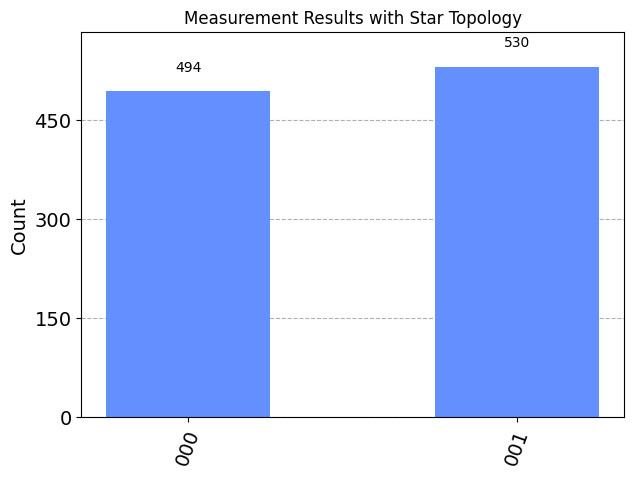

In [1]:
from qiskit import QuantumCircuit, transpile, Aer, execute, QuantumRegister
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.transpiler import Layout, CouplingMap
import matplotlib.pyplot as plt

%matplotlib inline

# Function to create a circuit that leverages the Star topology
def create_star_optimized_circuit(qr):
    qc = QuantumCircuit(qr)
    
    # Central qubit prepares and distributes entanglement
    qc.h(qr[0])           
    qc.cx(qr[0], qr[1])  
    qc.cx(qr[0], qr[2])   
    qc.barrier()
    
    # Additional operations
    qc.cx(qr[0], qr[1])
    qc.cx(qr[0], qr[2])
    
    qc.measure_all()
    return qc

# Function to transpile the circuit
def transpile_star_topology(circuit, qr):
    star_coupling_map = CouplingMap([[0, 1], [0, 2]])
    layout = Layout({qr[0]: 0, qr[1]: 1, qr[2]: 2})
    return transpile(circuit, backend=AerSimulator(), coupling_map=star_coupling_map, initial_layout=layout)


qr = QuantumRegister(3, 'q')
qc = create_star_optimized_circuit(qr)

# Transpile
qc_star = transpile_star_topology(qc, qr)

# Initialize simulator 
simulator = AerSimulator()
result_star = execute(qc_star, simulator).result()
counts_star = result_star.get_counts()

# Print the transpiled circuit
print("Transpiled Circuit with Star Topology:")
print(qc_star)

# Visualize
plot_histogram(counts_star, title="Measurement Results with Star Topology")

# Display circuit depth and gate counts
print("\nDepth of Circuit with Star Topology:", qc_star.depth())
print("Gate counts for Star Topology:", qc_star.count_ops())
